## Задание 6.4

Создайте новый признак confirmed_per_hundred, который покажет процентное отношение заболевших вирусом к общему числу населения в странах ().
Постройте тепловую карту, которая покажет, как росло число заболевших в процентах от общего числа населения (confirmed_per_hundred) в странах из таблицы croped_covid_df.
Выберите верные выводы по построенному графику:
A Из представленных стран самые быстрые темпы роста относительной заболеваемости — в Великобритании.
B Суммарное число заболевших в Австралии превышает 2 % от общего числа населения.
C Интенсивность относительной заболеваемости в России выше, чем в Германии.
D Из представленных стран самая низкая скорость распространения вируса — в Австралии.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#используем объединенный датасет о заболеваемости и вакцинации
croped_covid_df = pd.read_csv('data/croped_covid_df.csv')
croped_covid_df.head()

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,date,country,confirmed,deaths,recovered,active,...,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recover_rate,population,daily_confirmed_per_hundred,quarter
0,0,3616,3616,3616,2020-01-23,Australia,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25726900,NaN,1
1,1,3617,3617,3617,2020-01-25,Australia,4.0,0.0,0.0,4.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000016,1
2,2,3618,3618,3618,2020-01-26,Australia,4.0,0.0,0.0,4.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000000,1
3,3,3619,3619,3619,2020-01-27,Australia,5.0,0.0,0.0,5.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000004,1
4,4,3620,3620,3620,2020-01-28,Australia,5.0,0.0,0.0,5.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000000,1


In [3]:
croped_covid_df = croped_covid_df.drop(columns=['Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0'])
croped_covid_df.columns

Index(['date', 'country', 'confirmed', 'deaths', 'recovered', 'active',
       'daily_confirmed', 'daily_deaths', 'daily_recovered',
       'total_vaccinations', 'people_vaccinated',
       'people_vaccinated_per_hundred', 'people_fully_vaccinated',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations', 'vaccines',
       'death_rate', 'recover_rate', 'population',
       'daily_confirmed_per_hundred', 'quarter'],
      dtype='object')

In [5]:
croped_covid_df['confirmed_per_hundred'] = croped_covid_df['confirmed'] / croped_covid_df['population'] * 100

In [6]:
pivot = croped_covid_df.pivot_table(
    values='confirmed_per_hundred',
    columns='date',
    index='country',
)
pivot.columns = pivot.columns.astype('string')
display(pivot)

date,2020-01-23,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,...,2021-05-20,2021-05-21,2021-05-22,2021-05-23,2021-05-24,2021-05-25,2021-05-26,2021-05-27,2021-05-28,2021-05-29
country,,,,,,,,,,,,,,,,,,,,,
Australia,0.0,0.000016,0.000016,0.000019,0.000019,0.000019,0.000035,0.000035,0.000047,0.000047,...,0.116606,0.116621,0.116637,0.116683,0.116722,0.116788,0.116854,0.116897,0.116932,0.116983
Canada,NaN,NaN,0.000003,0.000003,0.000005,0.000005,0.000008,0.000008,0.000011,0.000011,...,3.599497,3.611526,3.620169,3.628017,3.632706,3.642529,3.648718,3.661252,3.669520,3.675536
Germany,NaN,NaN,NaN,NaN,0.000005,0.000005,0.000005,0.000006,0.000010,0.000012,...,4.345962,4.355632,4.363299,4.368845,4.371625,4.374704,4.380047,4.388347,4.395716,4.401106
Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000001,0.000001,0.000001,...,3.368999,3.375035,3.380916,3.386963,3.392637,3.397954,3.403604,3.409708,3.415960,3.422232
United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000003,0.000003,0.000003,...,6.594230,6.598223,6.601946,6.605033,6.608528,6.612093,6.616504,6.621495,6.627439,6.632219


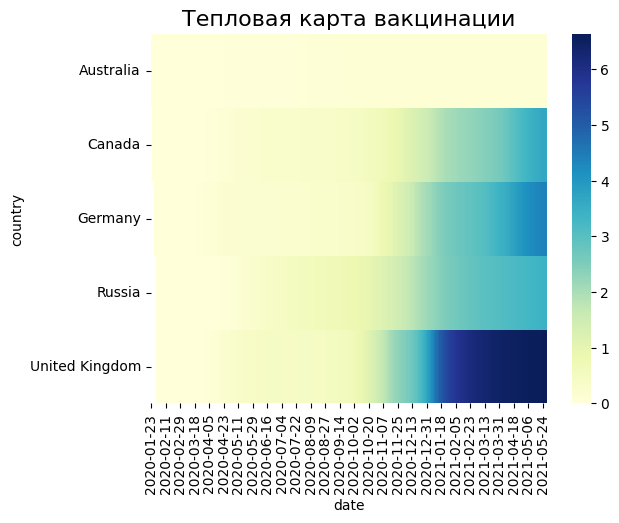

In [7]:
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта вакцинации', fontsize=16);

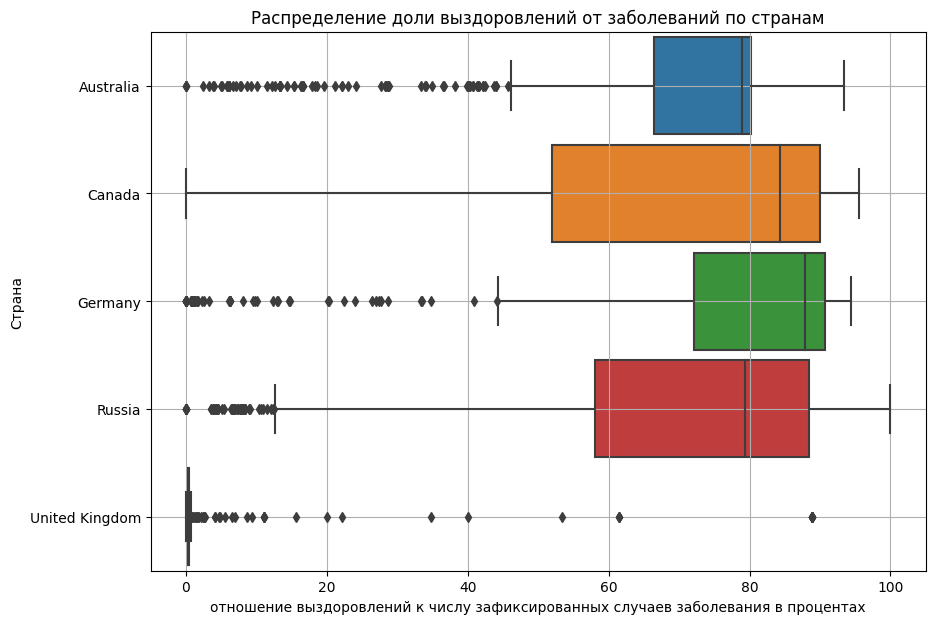

In [8]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=croped_covid_df,
    y='country',
    x='recover_rate',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение доли выздоровлений от заболеваний по странам');
boxplot.set_xlabel('отношение выздоровлений к числу зафиксированных случаев заболевания в процентах');
boxplot.set_ylabel('Страна');
boxplot.grid()

In [9]:
croped_covid_df.to_csv('data/croped_covid_df.csv')